In [300]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [301]:
# undirected graph with 22 nodes
graph = {
    'A': {'B': 4, 'C': 6, 'D': 3},
    'B': {'A': 4, 'E': 7, 'F': 2},
    'C': {'A': 6, 'G': 5, 'H': 8},
    'D': {'A': 3, 'I': 4},
    'E': {'B': 7, 'J': 6},
    'F': {'B': 2, 'J': 5, 'K': 4},
    'G': {'C': 5, 'L': 3},
    'H': {'C': 8, 'M': 6},
    'I': {'D': 4, 'N': 5},
    'J': {'E': 6, 'F': 5, 'O': 2},
    'K': {'F': 4, 'P': 7},
    'L': {'G': 3, 'Q': 4},
    'M': {'H': 6, 'R': 3},
    'N': {'I': 5, 'S': 6},
    'O': {'J': 2, 'T': 4},
    'P': {'K': 7, 'U': 3},
    'Q': {'L': 4, 'R': 2},
    'R': {'M': 3, 'Q': 2, 'V': 5},
    'S': {'N': 6, 'T': 3},
    'T': {'O': 4, 'S': 3, 'U': 6},
    'U': {'P': 3, 'T': 6, 'V': 2},
    'V': {'R': 5, 'U': 2}
}

In [302]:
G = nx.Graph(graph) # converting graph in dictionary format to a networkx graph

In [303]:
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        if G.has_edge(node, neighbor):
            G.add_edge(node, neighbor, weight=weight)

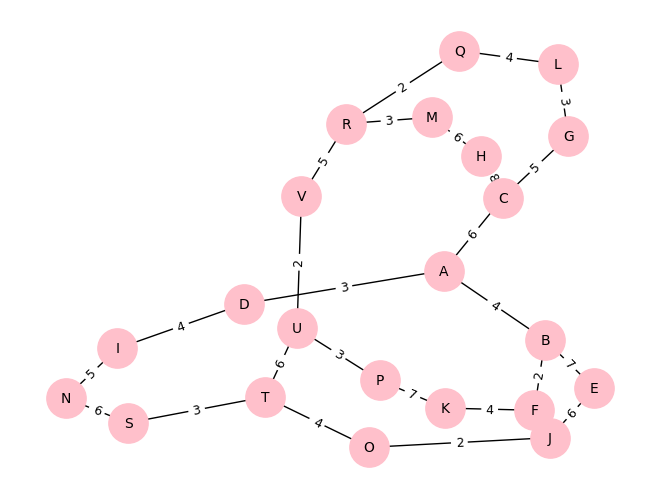

In [304]:
# draw graph function
def draw_graph(G):
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='pink', node_size=800, font_size=10)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=9)
    plt.show()

draw_graph(G)

In [305]:
# UCS
import heapq

def ucs(graph, start_node):
    visited, order = set(), []
    priority_queue = [(0, start_node)] # (cost = 0, start_node)
    cost_so_far = {start_node : 0}

    print(f'Starting UCS from node {start_node}')

    while priority_queue:
        current_cost, current_node = heapq.heappop(priority_queue)
        if current_node in visited:
            continue
        
        visited.add(current_node)
        order.append((current_node, current_cost))
        print(f'Visited node {current_node} with cumulative cost {current_cost}')

        for neighbor, edge_cost in graph[current_node].items():
            total_cost = current_cost + edge_cost
            if neighbor not in visited and (neighbor not in cost_so_far or total_cost < cost_so_far[neighbor]):
                cost_so_far[neighbor] = total_cost
                heapq.heappush(priority_queue, (total_cost, neighbor))

    return order

ucs_nodes = ucs(graph, 'A')


Starting UCS from node A
Visited node A with cumulative cost 0
Visited node D with cumulative cost 3
Visited node B with cumulative cost 4
Visited node C with cumulative cost 6
Visited node F with cumulative cost 6
Visited node I with cumulative cost 7
Visited node K with cumulative cost 10
Visited node E with cumulative cost 11
Visited node G with cumulative cost 11
Visited node J with cumulative cost 11
Visited node N with cumulative cost 12
Visited node O with cumulative cost 13
Visited node H with cumulative cost 14
Visited node L with cumulative cost 14
Visited node P with cumulative cost 17
Visited node T with cumulative cost 17
Visited node Q with cumulative cost 18
Visited node S with cumulative cost 18
Visited node M with cumulative cost 20
Visited node R with cumulative cost 20
Visited node U with cumulative cost 20
Visited node V with cumulative cost 22
